In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_hechos = pd.read_csv('../Data/df_hechos.csv')
df_victimas = pd.read_csv('../Data/df_victimas.csv')

print(df_hechos.shape)
df_hechos.head()

(696, 19)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,2016-01-01,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Friday
1,2016-0002,1,2016-01-02,2016,1,2,2016-01-02,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday
2,2016-0003,1,2016-01-03,2016,1,3,2016-01-03,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Sunday
3,2016-0004,1,2016-01-10,2016,1,10,2016-01-10,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,NaN,Sunday
4,2016-0005,1,2016-01-21,2016,1,21,2016-01-21,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Thursday


In [3]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               696 non-null    object 
 1   N_VICTIMAS       696 non-null    int64  
 2   FECHA            696 non-null    object 
 3   AAAA             696 non-null    int64  
 4   MM               696 non-null    int64  
 5   DD               696 non-null    int64  
 6   HORA             696 non-null    object 
 7   HH               695 non-null    float64
 8   LUGAR_DEL_HECHO  695 non-null    object 
 9   TIPO_DE_CALLE    696 non-null    object 
 10  Calle            695 non-null    object 
 11  COMUNA           696 non-null    int64  
 12  XY (CABA)        696 non-null    object 
 13  pos x            684 non-null    float64
 14  pos y            684 non-null    float64
 15  PARTICIPANTES    696 non-null    object 
 16  VICTIMA          687 non-null    object 
 17  ACUSADO         

In [4]:
df_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,HH,COMUNA,pos x,pos y
count,696.000000,696.000000,696.000000,696.000000,695.000000,696.000000,684.000000,684.000000
mean,1.030172,2018.188218,6.692529,15.936782,11.657554,7.425287,-58.441545,-34.619632
std,0.179393,1.683754,3.571309,8.639646,6.700090,4.387050,0.046144,0.035289
min,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017.000000,4.000000,9.000000,6.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020.000000,10.000000,23.000000,17.500000,11.000000,-58.401841,-34.596799
max,3.000000,2021.000000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654


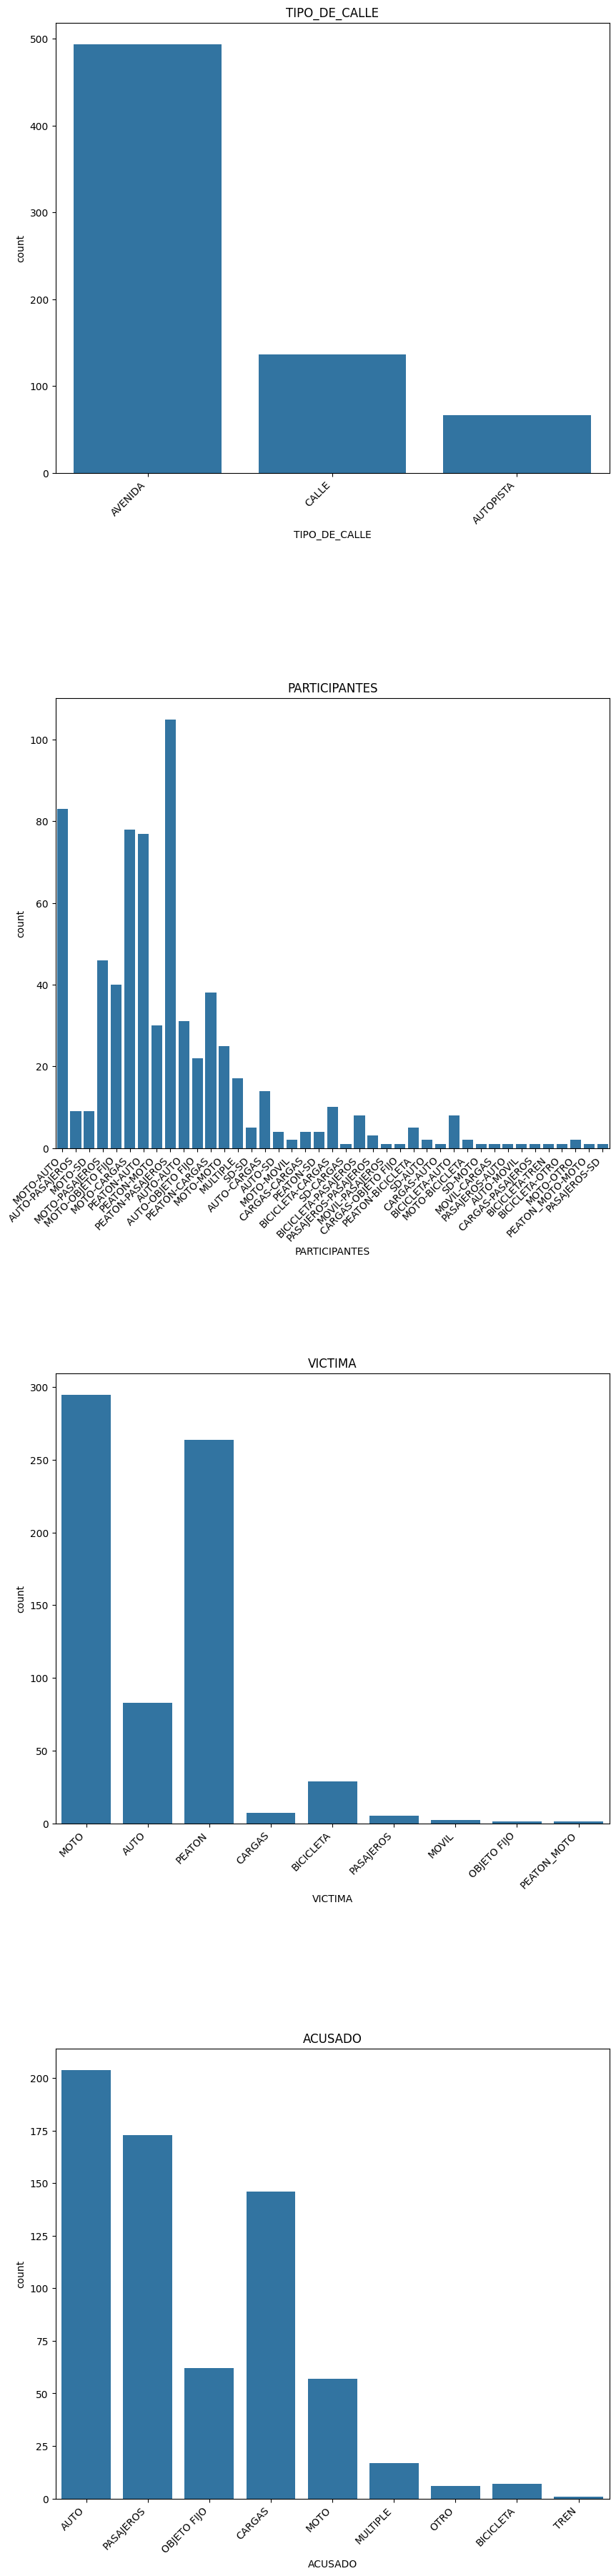

In [5]:
col_cat = ['TIPO_DE_CALLE', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_hechos, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

In [6]:
print(df_victimas.shape)
df_victimas.head()

(717, 12)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,MES,DIA_SEMANA,AAAA-MM
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,January,Friday,2016-1
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,January,Saturday,2016-1
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,January,Sunday,2016-1
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,January,Sunday,2016-1
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,January,Thursday,2016-1


In [7]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_hecho    717 non-null    object 
 1   FECHA       717 non-null    object 
 2   AAAA        717 non-null    int64  
 3   MM          717 non-null    int64  
 4   DD          717 non-null    int64  
 5   ROL         706 non-null    object 
 6   VICTIMA     708 non-null    object 
 7   SEXO        711 non-null    object 
 8   EDAD        664 non-null    float64
 9   MES         717 non-null    object 
 10  DIA_SEMANA  717 non-null    object 
 11  AAAA-MM     717 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 67.3+ KB


In [8]:
df_victimas.describe()

,AAAA,MM,DD,EDAD
count,717.000000,717.000000,717.000000,664.000000
mean,2018.174338,6.688982,15.960948,42.167169
std,1.672655,3.575140,8.683358,19.788034
min,2016.000000,1.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000,27.000000
50%,2018.000000,7.000000,16.000000,37.000000
75%,2019.000000,10.000000,23.000000,56.250000
max,2021.000000,12.000000,31.000000,95.000000


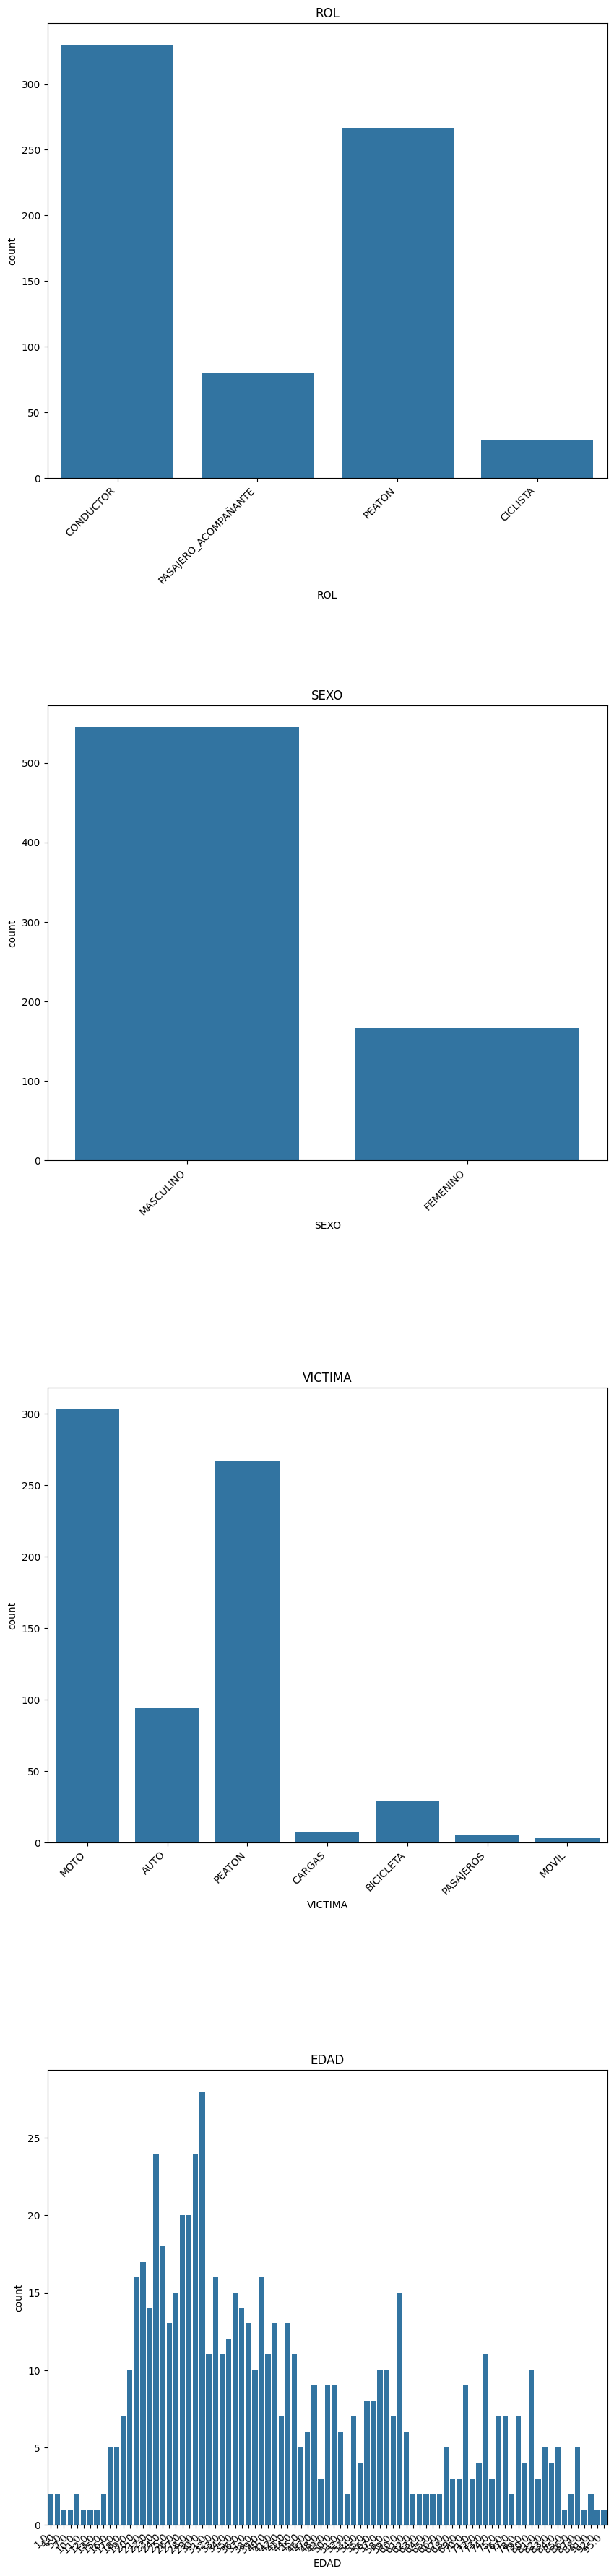

In [9]:
var_cat = ['ROL', 'SEXO', 'VICTIMA', 'EDAD']

fig, ax = plt.subplots(nrows=len(var_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(var_cat):
    sns.countplot(x=col, data=df_victimas, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

In [10]:
df_victimas.isnull().sum()

ID_hecho       0
FECHA          0
AAAA           0
MM             0
DD             0
ROL           11
VICTIMA        9
SEXO           6
EDAD          53
MES            0
DIA_SEMANA     0
AAAA-MM        0
dtype: int64

In [11]:
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')

df_victimas_edad = df_victimas.dropna(subset=['EDAD'])

df_victimas_edad['EDADES'] = pd.cut(df_victimas_edad['EDAD'], bins=[0, 20, 40, 60, 80, 100], right=False)

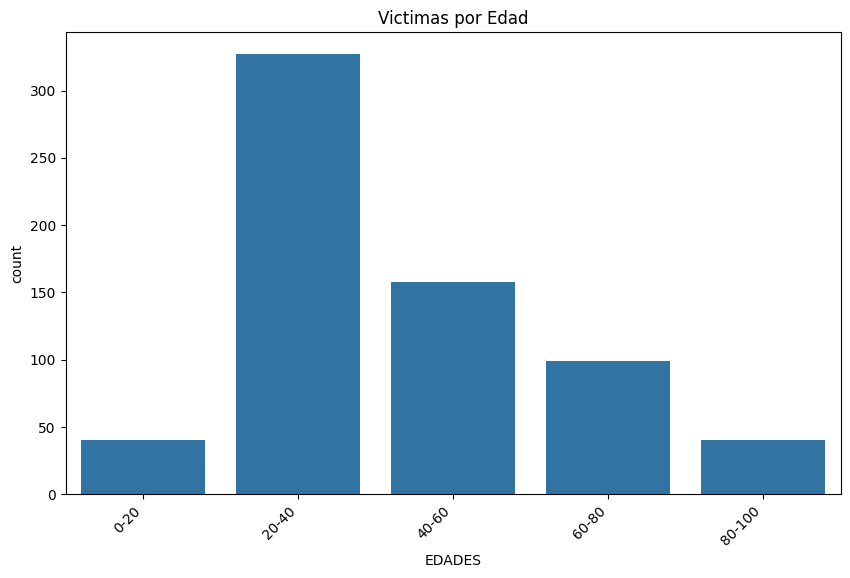

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='EDADES', data=df_victimas_edad, ax=ax)
ax.set_title('Victimas por Edad')

etiquetas = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticklabels(etiquetas, rotation=45, ha='right')

plt.show()

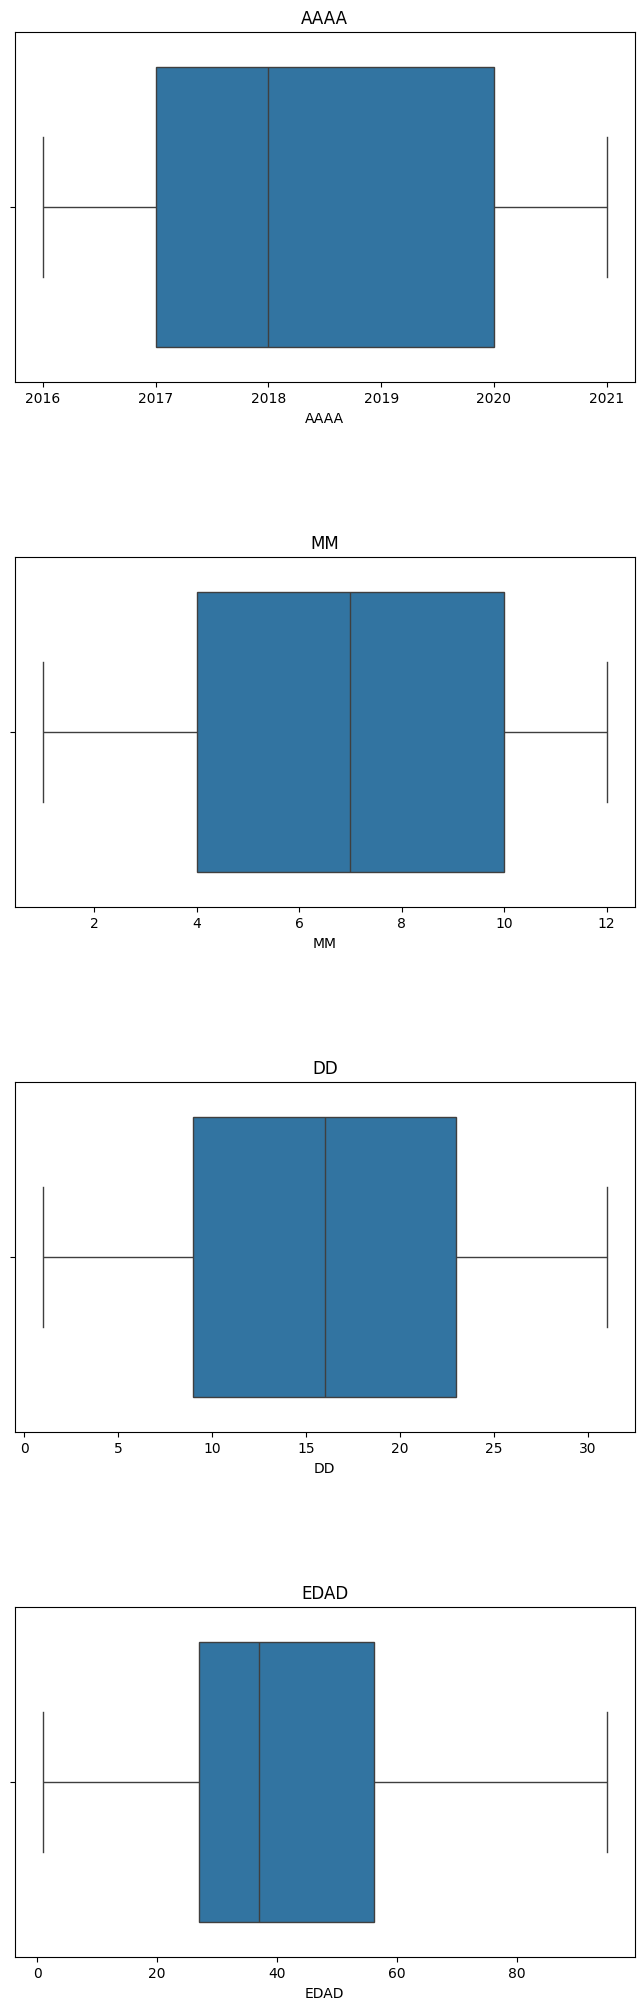

In [13]:
cols_num = ['AAAA', 'MM', 'DD', 'EDAD']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,25))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_victimas_edad, ax=ax[i])
    ax[i].set_title(col)

In [14]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_hecho    717 non-null    object 
 1   FECHA       717 non-null    object 
 2   AAAA        717 non-null    int64  
 3   MM          717 non-null    int64  
 4   DD          717 non-null    int64  
 5   ROL         706 non-null    object 
 6   VICTIMA     708 non-null    object 
 7   SEXO        711 non-null    object 
 8   EDAD        664 non-null    float64
 9   MES         717 non-null    object 
 10  DIA_SEMANA  717 non-null    object 
 11  AAAA-MM     717 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 67.3+ KB


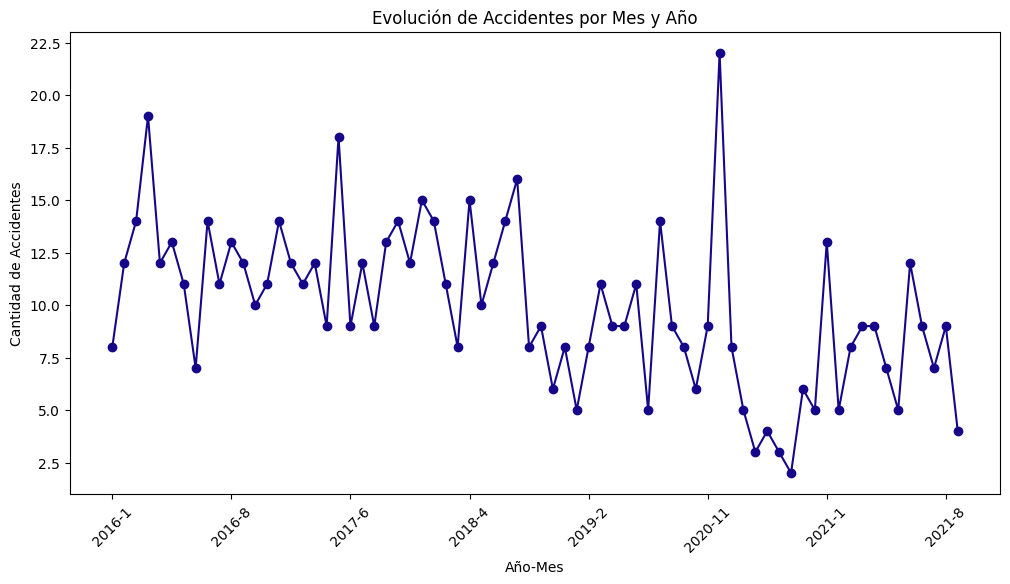

In [15]:
plt.figure(figsize=(12, 6))
df_victimas.groupby('AAAA-MM').size().plot(marker='o', color=sns.color_palette('plasma', n_colors=len(df_victimas['AAAA-MM'].unique())))
plt.title('Evolución de Accidentes por Mes y Año')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

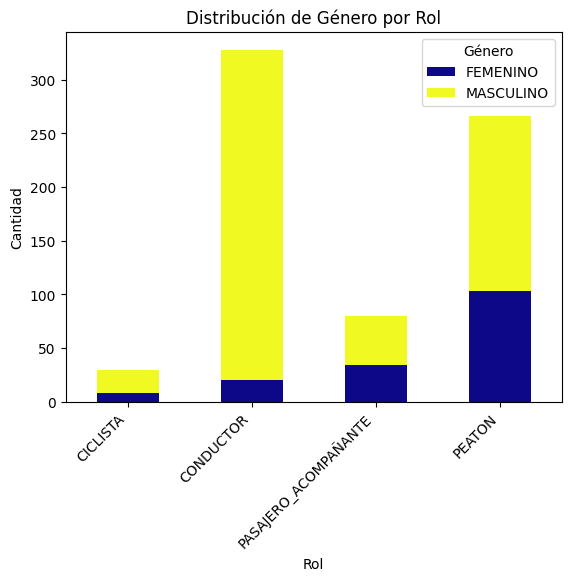

In [16]:
plt.figure(figsize=(12, 6))
genero_rol_df = df_victimas.groupby(['ROL', 'SEXO']).size().unstack()
ax = genero_rol_df.plot(kind='bar', stacked=True, colormap='plasma')

plt.title('Distribución de Género por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.legend(title='Género', loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


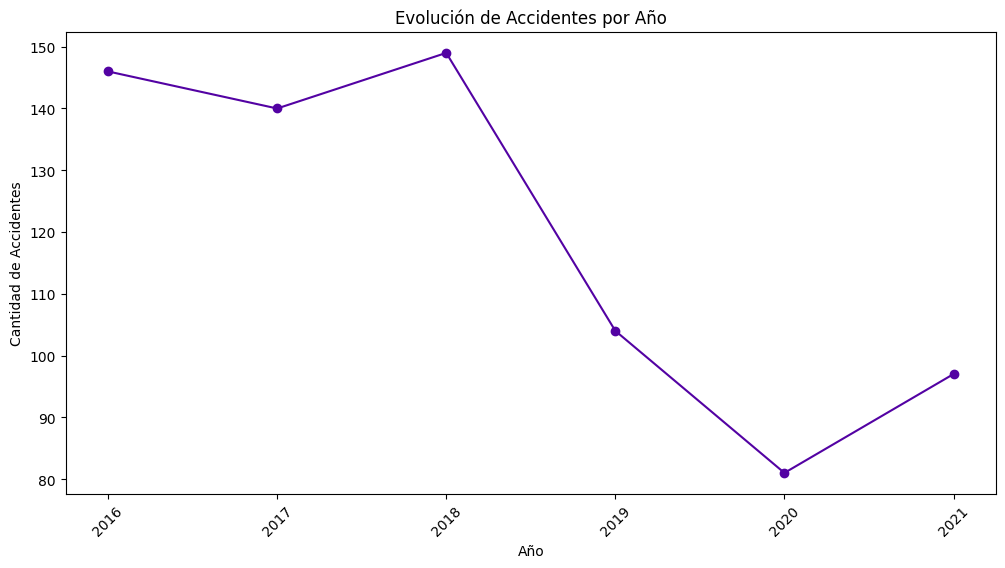

In [17]:
plt.figure(figsize=(12, 6))
df_victimas.groupby('AAAA').size().plot(marker='o', color=sns.color_palette('plasma', n_colors=len(df_victimas['AAAA'].unique())))
plt.title('Evolución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

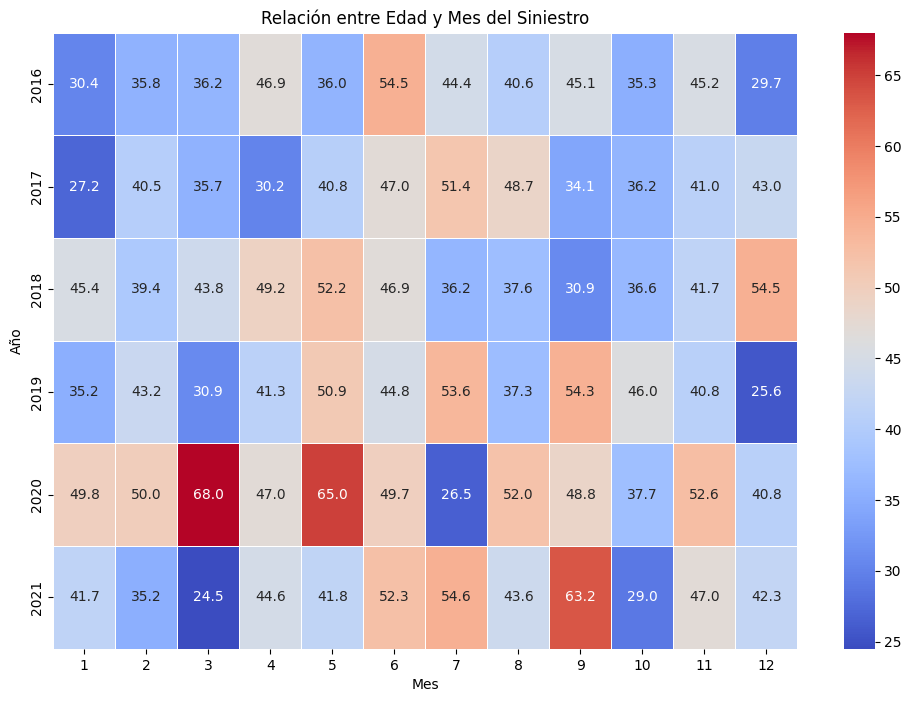

In [18]:
plt.figure(figsize=(12, 8))
heatmap_data = df_victimas.pivot_table(index='AAAA', columns='MM', values='EDAD', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Relación entre Edad y Mes del Siniestro')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()


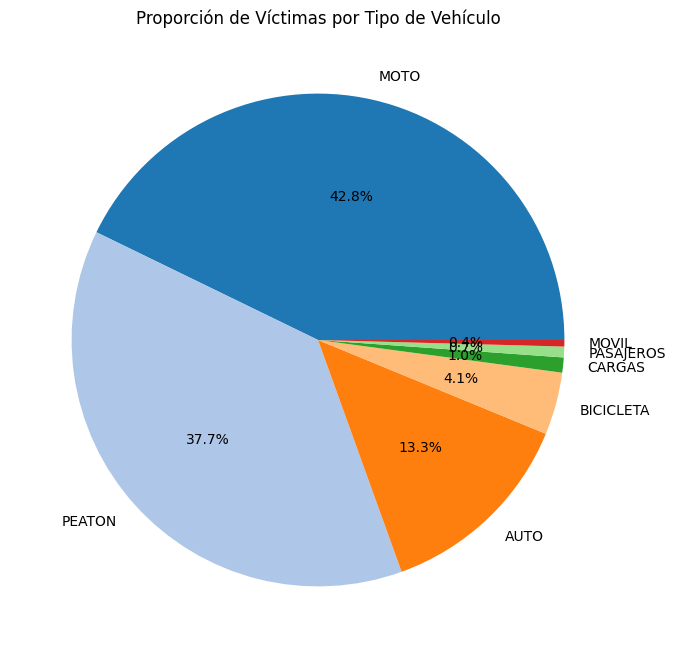

In [40]:
plt.figure(figsize=(8, 8))
vehiculo_palette = sns.color_palette('tab20', n_colors=len(df_victimas['VICTIMA'].unique()))
df_victimas['VICTIMA'].value_counts().plot.pie(autopct='%1.1f%%', colors=vehiculo_palette)
plt.title('Proporción de Víctimas por Tipo de Vehículo')
plt.ylabel('')
plt.show()


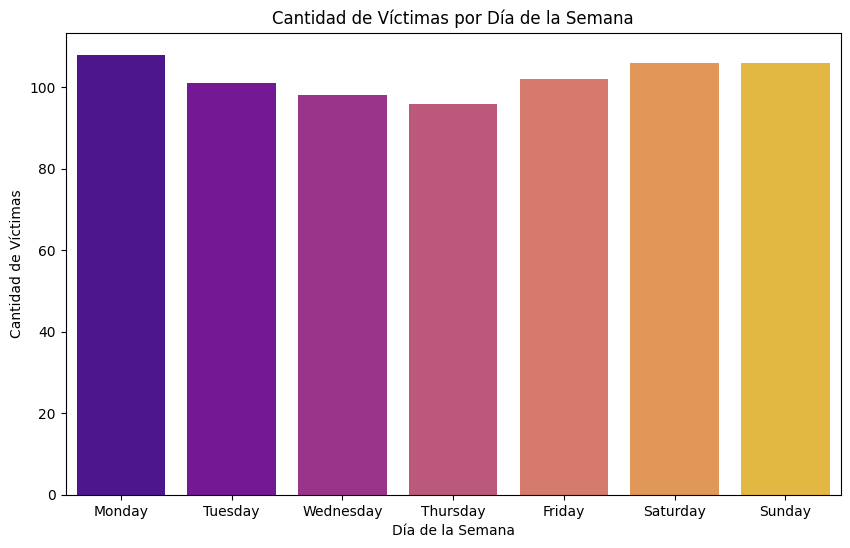

In [20]:
victimas_por_dia = df_victimas['DIA_SEMANA'].value_counts()

orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

victimas_por_dia = victimas_por_dia.reindex(orden_dias)

plt.figure(figsize=(10, 6))
sns.barplot(x=victimas_por_dia.index, y=victimas_por_dia.values, palette='plasma')
plt.title('Cantidad de Víctimas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Víctimas')
plt.show()


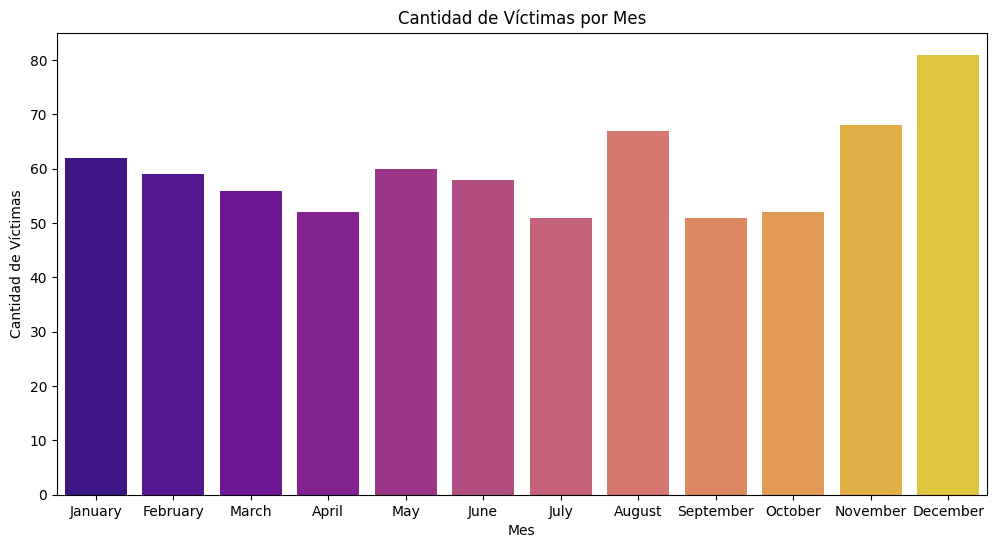

In [21]:
victimas_por_mes = df_victimas['MES'].value_counts()

orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

victimas_por_mes = victimas_por_mes.reindex(orden_meses)

plt.figure(figsize=(12, 6))
sns.barplot(x=victimas_por_mes.index, y=victimas_por_mes.values, palette='plasma')
plt.title('Cantidad de Víctimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Víctimas')
plt.show()

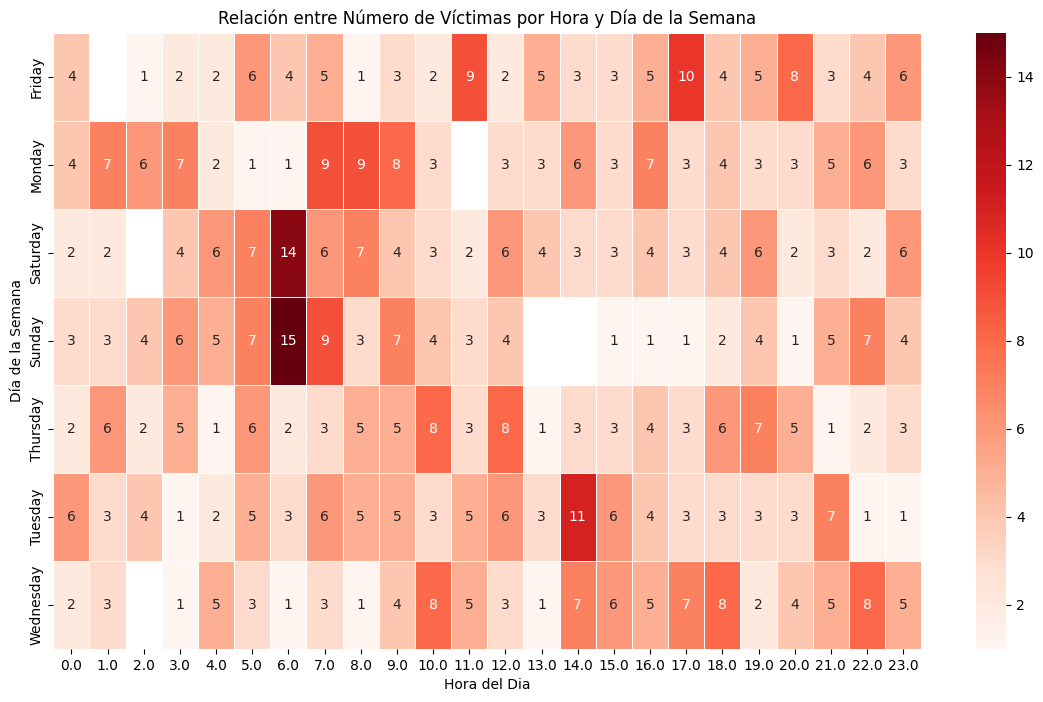

In [22]:
victimas_por_hora_dia = df_hechos.pivot_table(index='DIA_SEMANA', columns='HH', values='ID', aggfunc='count')

plt.figure(figsize=(14, 8))
sns.heatmap(victimas_por_hora_dia, cmap='Reds', annot=True, fmt='g', linewidths=.5)
plt.title('Relación entre Número de Víctimas por Hora y Día de la Semana')
plt.xlabel('Hora del Dia')
plt.ylabel('Día de la Semana')
plt.show()

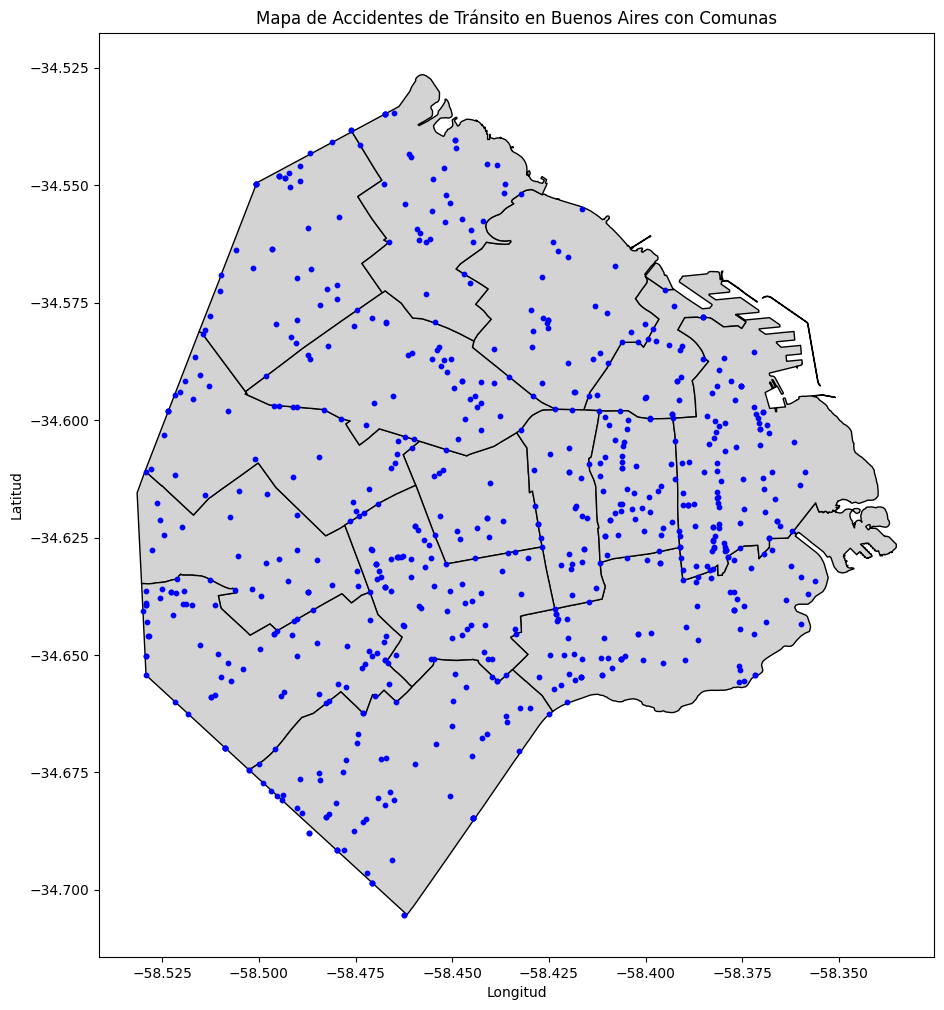

In [23]:
gdf_comunas = gpd.read_file('../Comunas/comunas_wgs84.shp')

geometry_puntos = [Point(xy) for xy in zip(df_hechos['pos x'], df_hechos['pos y'])]
gdf_puntos = gpd.GeoDataFrame(df_hechos, geometry=geometry_puntos, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 12))

gdf_comunas.plot(ax=ax, edgecolor='black', color='lightgray')

gdf_puntos.plot(ax=ax, marker='o', color='blue', markersize=10)

plt.title('Mapa de Accidentes de Tránsito en Buenos Aires con Comunas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

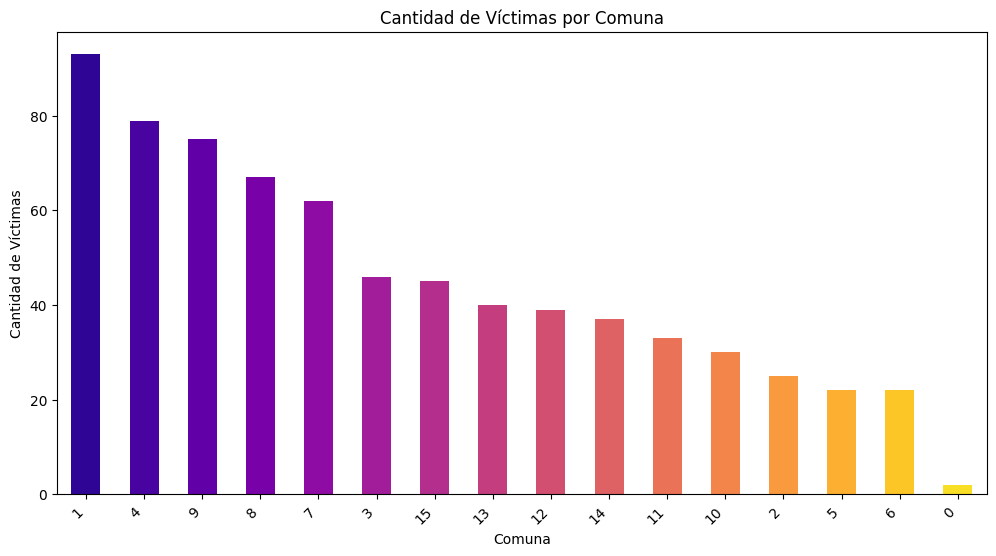

In [24]:
comunas_victimas = df_hechos.groupby('COMUNA')['N_VICTIMAS'].sum().sort_values(ascending=False)

colores = sns.color_palette('plasma', n_colors=len(comunas_victimas))

plt.figure(figsize=(12, 6))
comunas_victimas.plot(kind='bar', color=colores)
plt.title('Cantidad de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.show()